#Assignment 3 (Part I)



Install dependencies

In [ ]:
%rm -rf CarRacingWObstacles
!git clone https://github.com/luisgarrote/CarRacingWObstacles.git




UsageError: Line magic function `%rm` not found.


In [3]:
!pip install swig

  Using cached swig-4.4.0-py3-none-win_amd64.whl.metadata (3.5 kB)
Using cached swig-4.4.0-py3-none-win_amd64.whl (2.5 MB)


In [4]:
%cd CarRacingWObstacles

!pip install -r requirements.txt


[WinError 2] O sistema não conseguiu localizar o ficheiro especificado: 'CarRacingWObstacles'
c:\Users\cedri\Documents\GitHub\CarRacingWObstacles
  Using cached gymnasium-1.2.3-py3-none-any.whl.metadata (10 kB)
  Using cached cloudpickle-3.1.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/10.6 MB 9.4 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/10.6 MB 10.7 MB/s eta 0:00:01
   --------------------------- ------------ 7.3/10.6 MB 12.6 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.6 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 11.8 MB/s  0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 16.6 MB/s  0:00:00
Using cached gymnasium-1.2.3-py3-none-any

Imports

In [5]:
pip install -e .


Obtaining file:///C:/Users/cedri/Documents/GitHub/CarRacingWObstacles
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for car_racing_obstacles
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Legacy editable install of car_racing_obstacles==0.1.0 from file:///C:/Users/cedri/Documents/GitHub/CarRacingWObstacles (setup.py develop) is deprecated. pip 25.3 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import figure

import gymnasium as gym
import torch
from torch.utils import data
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd
import random
from gymnasium import wrappers
import copy
from gymnasium.wrappers import RecordVideo

import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

from car_racing_obstacles import CarRacingObstacles
gym.register(
    id="CarRacingObstacles-v3",
    entry_point="car_racing_obstacles:CarRacingObstacles",
)

print(device)


cuda:0


c:\Users\cedri\anaconda3\envs\pytorch_env\Lib\site-packages\gymnasium\envs\registration.py:636: UserWarning: WARN: Overriding environment CarRacingObstacles-v3 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


Deep RL Replay Buffer

In [42]:
class ReplayBuffer:
    def __init__(self, size):
        self.size = size
        self.counter = 0
        self.state_buffer = []
        self.action_buffer = []
        self.reward_buffer = []
        self.new_state_buffer = []
        self.terminal_buffer = []

    def store_tuples(self, state, action, reward, new_state, done):
        if len(self.state_buffer) < self.size:
            self.state_buffer.append(None)
            self.action_buffer.append(None)
            self.reward_buffer.append(None)
            self.new_state_buffer.append(None)
            self.terminal_buffer.append(None)

        self.counter = self.counter % self.size
        self.state_buffer[self.counter] = state
        self.action_buffer[self.counter] = action
        self.reward_buffer[self.counter] = reward
        self.new_state_buffer[self.counter] = new_state
        self.terminal_buffer[self.counter] = done
        self.counter += 1

    def sample_buffer(self, batch_size):
        max_buffer = min(self.counter, self.size)
        batch = np.random.choice(max_buffer, batch_size, replace=False)
        state_batch=[];
        action_batch=[];
        reward_batch=[];
        new_state_batch=[];
        done_batch=[];

        for a in batch:
            state_batch.append(self.state_buffer[a])
            action_batch.append(self.action_buffer[a])
            reward_batch.append(self.reward_buffer[a])
            new_state_batch.append(self.new_state_buffer[a])
            done_batch.append(self.terminal_buffer[a])
        return state_batch, action_batch, reward_batch, new_state_batch, done_batch





Default DQN arquitecture

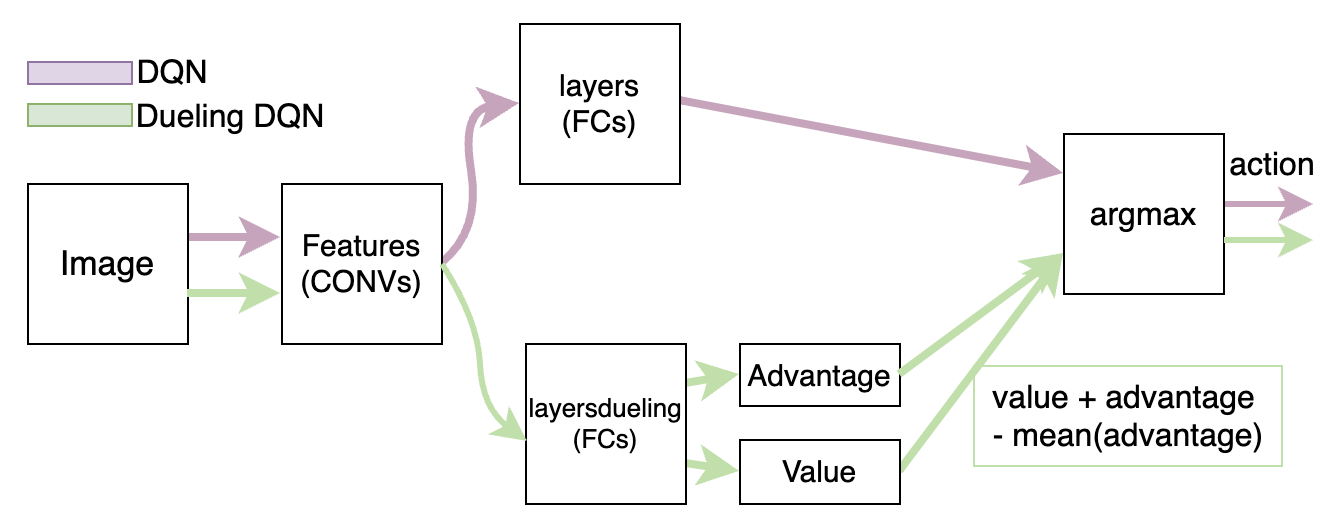

## CNN 1

In [44]:
from torchvision import datasets, models
class DQN(nn.Module):

    def __init__(self, inputs, outputs):
        super(DQN, self).__init__()

        self.input_size=inputs;
        self.output_size=outputs;


        self.features = nn.Sequential(
                                   #Add code here for DQN
                                   #you can use the same code for dueling
            nn.Conv2d(inputs, 6, 7,stride=3, padding=1),  # Conv1
            nn.ReLU(True),
            nn.MaxPool2d(2,2),  # Conv1
            nn.Conv2d(6, 12, 4, padding=1),  # Conv1
            nn.ReLU(True),
            nn.MaxPool2d(2,2),  # Conv1
        )

        self.layers = nn.Sequential(nn.Linear(588, 128),
            nn.ReLU(),
            nn.Linear(128, outputs)
        )


        self.layersdueling = nn.Sequential(
            nn.Linear( 588, 128),
            nn.ReLU()
        )


        self.advantage = nn.Sequential(
            nn.Linear(128, outputs)
        )

        self.value = nn.Sequential(
            nn.Linear(128, 1)
        )

###### DQN/Double DQN configuration

###########    ############    #################
#         #    #          #    #               #
#   IMG   # -> # features # -> #     layers    #    .... argmax ....
#         #    #  (CONVs) #    #     (FCs)     #
###########    ############    #################


###### Dueling configuration
                                                    #############
###########    ############    #################    # advantage #
#         #    #          #    #               # -> #############   ... value + advantage  - advantage.mean() ... argmax ...
#   IMG   # -> # features # -> # layersdueling # -> #############
#         #    #  (CONVs) #    #     (FCs)     #    #   value   #
###########    ############    #################    #############





    def forward(self, x):  # primeiras alteracoes para ter QN


        x = self.features(x) # normal para passar pelas conv layers

        x = x.view(x.size(0), -1) # dar flat para as conv layers

        if useDueling: # DQN ou Dueling 
            x = self.layersdueling(x)
            advantage = self.advantage(x)
            value = self.value(x)
            return value + advantage - advantage.mean(dim=1, keepdim=True) # Q(s,a) = V(s) + (A(s,a) - mean(A(s,a))) formula enunciado
        
        else:
            x = self.layers(x)
            return x






    def policy(self,state):
       with torch.no_grad():
            return self.__call__(state.unsqueeze(0)).argmax()

    def getPolicy(self,state,eps_threshold):
        sample = random.random()
        if sample > eps_threshold:
            with torch.no_grad():
                return self.__call__(state.unsqueeze(0)).argmax()
        else:
            return  torch.tensor(random.randrange(self.output_size), device=device, dtype=torch.long)


## CNN 2

In [69]:
from torchvision import datasets, models
class DQN(nn.Module):

    def __init__(self, inputs, outputs):
        super(DQN, self).__init__()

        self.input_size=inputs;
        self.output_size=outputs;


        self.features = nn.Sequential(

            nn.Conv2d(inputs, 16, 7, stride=3, padding=1),  # Conv1
            nn.ReLU(True),
            nn.MaxPool2d(2,2),  # Conv1
            nn.Conv2d(16, 32, 4, padding=1),  # Conv1
            nn.ReLU(True),
            nn.MaxPool2d(2,2),  # Conv1
        )

        self.layers = nn.Sequential(nn.Linear(1568, 256),
            nn.ReLU(),
            nn.Linear(256, outputs)
        )


        self.layersdueling = nn.Sequential(
            nn.Linear( 1568, 256),
            nn.ReLU()
        )


        self.advantage = nn.Sequential(
            nn.Linear(256, outputs)
        )

        self.value = nn.Sequential(
            nn.Linear(256, 1)
        )

###### DQN/Double DQN configuration

###########    ############    #################
#         #    #          #    #               #
#   IMG   # -> # features # -> #     layers    #    .... argmax ....
#         #    #  (CONVs) #    #     (FCs)     #
###########    ############    #################


###### Dueling configuration
                                                    #############
###########    ############    #################    # advantage #
#         #    #          #    #               # -> #############   ... value + advantage  - advantage.mean() ... argmax ...
#   IMG   # -> # features # -> # layersdueling # -> #############
#         #    #  (CONVs) #    #     (FCs)     #    #   value   #
###########    ############    #################    #############





    def forward(self, x):  # primeiras alteracoes para ter QN


        x = self.features(x) # normal para passar pelas conv layers

        x = x.view(x.size(0), -1) # dar flat para as conv layers

        if useDueling: # DQN ou Dueling 
            x = self.layersdueling(x)
            advantage = self.advantage(x)
            value = self.value(x)
            return value + advantage - advantage.mean(dim=1, keepdim=True) # Q(s,a) = V(s) + (A(s,a) - mean(A(s,a))) formula enunciado
        
        else:
            x = self.layers(x)
            return x






    def policy(self,state):
       with torch.no_grad():
            return self.__call__(state.unsqueeze(0)).argmax()

    def getPolicy(self,state,eps_threshold):
        sample = random.random()
        if sample > eps_threshold:
            with torch.no_grad():
                return self.__call__(state.unsqueeze(0)).argmax()
        else:
            return  torch.tensor(random.randrange(self.output_size), device=device, dtype=torch.long)


In [27]:
from IPython.display import HTML
HTML('<iframe width="1297" height="865" src="https://www.youtube.com/embed/kXXdMlyP4OE" title="APA2025 - CarRacingObstacles-v3" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')



c:\Users\cedri\anaconda3\envs\pytorch_env\Lib\site-packages\IPython\core\display.py:447: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


OpenAI Environment CarRacing-v2
[Sample result](https://youtu.be/kXXdMlyP4OE)

###    Description:
        Continuous or discrete control task to learn from pixels, a top-down racing environment.
###    Observation:
        Type: Image (96x96x3)
        Some indicators are shown at the bottom of the window along with the state RGB buffer. From left to right: the true speed, four ABS sensors, the steering wheel position and gyroscope.
###    Actions:
        Discrete Mode: 'nothing','left','right','gas','brake'
        Continuous Mode: 3 different variables can be modified: steering wheel, gas, and brake. For the methods explored in this Colab, discrete control commands are reasonable (a set of control commands is provided for this mode).
###    Reward:
        The reward is -0.1 every frame and +1000/N for every track tile visited, where N is the total number of tiles visited in the track. For example, if you have finished in 732 frames, your reward is 1000 - 0.1*732 = 926.8 points.
###    Starting State:
        The tracks and colors are randomly generated with UseRandomize=True for each episode. With UseRandomize=False, only the tracks are random.
###    Episode Termination:
        Car is too faraway from the track.
        Car accumulated a negative reward after given iterations (see ResetCounter and InitCounter).
        Episode length is greater than 1000.
        All tiles are visited.
###     Solved Requirements:
        The game is solved when the agent consistently gets 900+ points. For this assignment a minimum of 200 points are required.


DQN movie generation (for visual evaluation in Google Colab)

In [45]:

def createMovie(Network,Filename,UseRandomizer,UseContinuous):

    env1 = gym.make("CarRacingObstacles-v3", render_mode="rgb_array",domain_randomize=UseRandomizer, continuous=UseContinuous)
    envX = env1
    envX = RecordVideo(env1, video_folder='./videos/'+Filename,  episode_trigger = lambda x: True)

    new_state = envX.reset(options={"randomize": UseRandomizer})


    stackedStateX=[np.rollaxis(new_state[0], 2, 0).copy() for i in range(FrameStack)];
    state =torch.from_numpy(np.reshape(np.array(stackedStateX),(FrameSize*FrameStack,96,96)) ).float().to(device)


    i=0
    Network.eval()
    resetStatus=0;


    while True:
        envX.render()

        action = Network.policy(state);
        reward=0
        for x in range(ControlSteps):
            new_state, r, done, truncated, _  = envX.step(action_space[action.item()])
            reward+=r
            if(done or truncated):
                break
        stackedStateX.pop(0)


        stackedStateX.append(np.rollaxis(new_state, 2, 0).copy())
        state=torch.from_numpy(np.reshape(np.array(stackedStateX),(FrameSize*FrameStack,96,96))).float().to(device)
        i=i+1;
        if done or truncated:
          break;

    envX.close()
    env1.close();
    Network.train()
    mp4list = glob.glob('./videos/'+Filename+'/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

Dummy Net with random policy

In [47]:
class RandomNet(nn.Module):

    def __init__(self,outputs):
        super(RandomNet, self).__init__()
        self.output_size=outputs;


    def forward(self, x):
        return  x

    def policy(self,state):
       return  torch.tensor([[random.randrange(self.output_size)]], device=device, dtype=torch.long)



Parameters

In [71]:



###################################################
###################################################
###################################################
UseRandomize=False;
UseContinuousControl=False; # ALTERAR !! Primeiro foi testado com True, agora com false
###################################################
###################################################
###################################################


if UseContinuousControl:
    #action space is still discretized however more actions can be selected
    action_space    = [
            np.array([-1, 1, 0.2]), np.array([0, 1, 0.2]), np.array([1, 1, 0.2]), #           Action Space Structure
            np.array([-1, 1,   0]), np.array([0, 1,   0]), np.array([1, 1,   0]), #        (Steering Wheel, Gas, Break)
            np.array([-1, 0, 0.2]), np.array([0, 0, 0.2]), np.array([1, 0, 0.2]), # Range        -1~1       0~1   0~1
            np.array([-1, 0,   0]), np.array([0, 0,   0]), np.array([1, 0,   0]) ];


else:
    action_space=[0,1,2,3,4]    #  nothing','left','right','gas','brake'

n_actions=len(action_space)

#hyper-parameters
TotalEpisodes=1000;
MaxSteps=1000;
ControlSteps=3; # number of iterations the same action is executed in the environment
FrameStack=1 # number of consecutive frames used to represent the state
FreezeCounter=50; # clone the model every X episodes
BatchSize=64;
exploration_threshold=1
exploration_threshold_min=0.01
exploration_decay=0.985
discount_factor=0.95 # valor a alterar para tentar obter melhores resultados
LearningRate=0.0001

SaveAtCounter=50 # save model or video at every X episodes
ResetCounter=30 # maximum number of experiences with bad performance (max=InitCounter+ResetCounter)
InitCounter=30 # minimum number of experiences per episode
FrameSize=3; # 3 if RGB 1 if grayscale

BufferSize=20000  # max number of experiences in the buffer (may need to be smaller if CUDA memory errors occur).


# use these flags to enable Double DQN and Duelinng (Dueling DQN or Double Dueling DQN)
usedoubleDQN=True
useDueling=True



Run the new netwwork with random policy

In [18]:
pip install moviepy

   ---------------------------------------- 0.0/31.2 MB ? eta -:--:--
   --- ------------------------------------ 2.9/31.2 MB 14.0 MB/s eta 0:00:03
   ------- -------------------------------- 5.8/31.2 MB 14.1 MB/s eta 0:00:02
   --------- ------------------------------ 7.1/31.2 MB 11.2 MB/s eta 0:00:03
   ------------ --------------------------- 9.4/31.2 MB 11.5 MB/s eta 0:00:02
   ---------------- ----------------------- 13.1/31.2 MB 12.5 MB/s eta 0:00:02
   -------------------- ------------------- 16.3/31.2 MB 13.0 MB/s eta 0:00:02
   ------------------------- -------------- 19.7/31.2 MB 13.5 MB/s eta 0:00:01
   ----------------------------- ---------- 23.3/31.2 MB 14.1 MB/s eta 0:00:01
   --------------------------------- ------ 26.2/31.2 MB 14.0 MB/s eta 0:00:01
   ------------------------------------- -- 29.6/31.2 MB 14.2 MB/s eta 0:00:01
   ---------------------------------------- 31.2/31.2 MB 14.1 MB/s  0:00:02

   -------- ------------------------------- 1/5 [imageio_ffmpeg]
  

In [19]:
randomnet=RandomNet(n_actions)
createMovie(randomnet,"random",UseRandomize,UseContinuousControl)

c:\Users\cedri\anaconda3\envs\pytorch_env\Lib\site-packages\gymnasium\wrappers\rendering.py:293: UserWarning: WARN: Overwriting existing videos at c:\Users\cedri\Documents\GitHub\CarRacingWObstacles\videos\random folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Initialization and Parameters:


In [72]:
env = gym.make("CarRacingObstacles-v3", render_mode="rgb_array",domain_randomize=UseRandomize, continuous=UseContinuousControl)
spec = gym.spec("CarRacingObstacles-v3")


#network DQN
policy_net = DQN(FrameSize*FrameStack, n_actions).to(device)
target_net = DQN(FrameSize*FrameStack, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

buffer = ReplayBuffer(BufferSize);

optimizer = torch.optim.Adam(policy_net.parameters(), lr=LearningRate)
loss=  torch.nn.SmoothL1Loss()

DQN training

In [73]:
def trainModel(buffer_data):
    if buffer_data.counter < BatchSize:
        return 0.0

    state_batch, action_batch, reward_batch, new_state_batch, done_batch = buffer_data.sample_buffer(BatchSize)
    state_batch = torch.stack(state_batch).to(device)
    action_batch = torch.stack(action_batch).reshape(-1,1).to(device)
    new_state_batch = torch.stack(new_state_batch).to(device)
    reward_batch = torch.stack(reward_batch).reshape(-1,1).to(device)
    done_batch = torch.stack(done_batch).reshape(-1,1).to(device)


    q_values = policy_net(state_batch)
    q_values = q_values.gather(1, action_batch)


    with torch.no_grad(): # congelar pesos ??
        if usedoubleDQN: # utilizar double DQN
            next_actions = policy_net(new_state_batch).argmax(dim=1, keepdim=True) # policy_net escolhe a melhor acao para o proximo state
            next_q_values = target_net(new_state_batch).gather(1, next_actions) # target_net calcula o valor para essa acao
        
        else: # utilizar DQN normal
            next_q_values = target_net(new_state_batch).max(1)[0].unsqueeze(1)


    expected_q_values = reward_batch + (discount_factor * next_q_values * (1 - done_batch))
    loss_val = loss(q_values, expected_q_values)

    optimizer.zero_grad()
    loss_val.backward()

    #torch.nn.utils.clip_grad_norm_(policy_net.parameters(), 1.0) # estabilizar gradientes

    optimizer.step()

    return loss_val.item()

DeepRL Loop

In [74]:
loss_val,scores, episodes,events, avg_scores,avg_scores20,exploration = [],[],[], [],[], [], []

bestScore=-99999;
at=0;


for f in range(TotalEpisodes):
    done  = False
    score = 0.0
    tloss = 0.0

    new_state,_=env.reset(options={"randomize": UseRandomize})#,seed=6)


    stackedState=[np.rollaxis(new_state, 2, 0).copy() for i in range(FrameStack)];
    state =torch.from_numpy(np.reshape(np.array(stackedState),(FrameSize*FrameStack,96,96)) ).float().to(device)

    if f % FreezeCounter == 0:
       print("########################################"+str(f)+" of "+str(TotalEpisodes))
       target_net.load_state_dict(policy_net.state_dict())

    if f % SaveAtCounter == 0:
      #torch.save(policy_net.state_dict(), "v2CarRacing_"+str(f)+'_model.ckpt')
       createMovie(policy_net,"CarRacing_"+str(f),UseRandomize,UseContinuousControl)

    resetStatus=0;
    i=0

    for F in range(MaxSteps):
        #env.render()
        action = policy_net.getPolicy(state,exploration_threshold)
        reward=0
        for _ in range(ControlSteps):
            new_state, r, done,trunc, info = env.step(action_space[action.item()])
            reward+=r
            i=i+1
            if(done or trunc):
                break
        if reward<0 and i>InitCounter:
            resetStatus=resetStatus+1;
        else:
            resetStatus=0

        stackedState.pop(0)
        stackedState.append(np.rollaxis(new_state, 2, 0).copy())
        new_state=torch.from_numpy(np.reshape(np.array(stackedState),(FrameSize*FrameStack,96,96))).float().to(device)

        score += reward
        if(F<(MaxSteps-1)):
            buffer.store_tuples(state, action, torch.tensor(reward), new_state, torch.tensor(int(done)))

        state = new_state
        trainModel(buffer)


        if(done or trunc or resetStatus>=ResetCounter):
            break
    exploration_threshold= exploration_threshold*exploration_decay if exploration_threshold > exploration_threshold_min else exploration_threshold_min

    if(score>bestScore):
        print("Best EP: ",score," It: ",F*ControlSteps)
        bestScore=score;
        torch.save(policy_net.state_dict(), "BestCarRacing_best_model.ckpt")
        at=f;

    exploration.append(exploration_threshold)
    scores.append(score)
    episodes.append(f)
    events.append(F)
    avg_scores.append(score/F)
    avg_scores20.append(np.mean(scores[-20:]))


policy_net.load_state_dict(torch.load("BestCarRacing_best_model.ckpt", weights_only=True))


########################################0 of 1000


Best EP:  12.08579881656807  It:  336
Best EP:  23.634951456310787  It:  321
Best EP:  46.02258064516153  It:  999
Best EP:  78.08617886178791  It:  879
########################################50 of 1000


Best EP:  89.91506849315005  It:  462
Best EP:  175.33138686131605  It:  504
Best EP:  191.13529411765043  It:  924
########################################100 of 1000


########################################150 of 1000


########################################200 of 1000


########################################250 of 1000


########################################300 of 1000


Best EP:  290.3631578947353  It:  435
########################################350 of 1000


Best EP:  568.7443609022458  It:  741
########################################400 of 1000


Best EP:  795.8082706766753  It:  957
########################################450 of 1000


Best EP:  1281.640293040289  It:  999
########################################500 of 1000


Best EP:  1640.037254901974  It:  999
########################################550 of 1000


########################################600 of 1000


########################################650 of 1000


KeyboardInterrupt: 

Plot performance

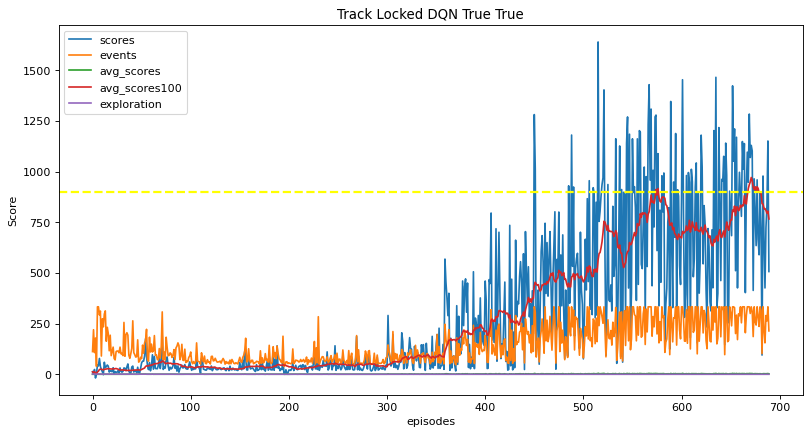

In [77]:
figure(figsize=(12, 6), dpi=80)
plt.plot(episodes, scores)
plt.plot(episodes, events)
plt.plot(episodes, avg_scores)
plt.plot(episodes, avg_scores20)
plt.plot(episodes, exploration)

plt.axhline(y=900, color='yellow', linestyle='--', linewidth=2)

plt.xlabel('episodes')
plt.ylabel('Score')

plt.title('Track Locked DQN '+str(usedoubleDQN)+' '+str(useDueling))
plt.legend(['scores', 'events', 'avg_scores', 'avg_scores100','exploration'])
plt.show()

View Best Results

In [82]:
policy_net.eval()

createMovie(policy_net,'bestNet',UseRandomize,UseContinuousControl)




In [84]:
def evaluate(Network,UseRandomizer,UseContinuous,seedTest):

    env1 = gym.make("CarRacingObstacles-v3", render_mode="rgb_array",domain_randomize=UseRandomizer, continuous=UseContinuous)
    envX = env1

    new_state = envX.reset(options={"randomize": UseRandomizer},seed=seedTest)#,seed=6)
    new_state, _ = envX.reset(options={"randomize": UseRandomizer},seed=seedTest)#,seed=6)


    stackedStateX=[np.rollaxis(new_state, 2, 0).copy() for i in range(FrameStack)];
    state =torch.from_numpy(np.reshape(np.array(stackedStateX),(FrameSize*FrameStack,96,96)) ).float().to(device)


    i=0
    Network.eval()
    resetStatus=0;

    totalreward=0
    while True:
        action = Network.policy(state);
        reward=0
        for x in range(ControlSteps):
            new_state, r, done, truncated, _  = envX.step(action_space[action.item()])
            reward+=r
            if(done):
                break

        totalreward+=reward;
        stackedStateX.pop(0)

        stackedStateX.append(np.rollaxis(new_state, 2, 0).copy())
        state=torch.from_numpy(np.reshape(np.array(stackedStateX),(FrameSize*FrameStack,96,96))).float().to(device)
        i=i+1;
        if done or truncated:
          break;

    envX.close()
    return totalreward;

In [85]:
print("Total Reward: ",evaluate(policy_net,False,UseContinuousControl,1))
print("Total Reward: ",evaluate(policy_net,False,UseContinuousControl,2))
print("Total Reward: ",evaluate(policy_net,False,UseContinuousControl,3))
print("Total Reward: ",evaluate(policy_net,False,UseContinuousControl,4))
print("Total Reward: ",evaluate(policy_net,False,UseContinuousControl,5))
print("Total Reward: ",evaluate(policy_net,True,UseContinuousControl,6))
print("Total Reward: ",evaluate(policy_net,True,UseContinuousControl,7))
print("Total Reward: ",evaluate(policy_net,True,UseContinuousControl,8))
print("Total Reward: ",evaluate(policy_net,True,UseContinuousControl,9))
print("Total Reward: ",evaluate(policy_net,True,UseContinuousControl,10))


Total Reward:  499.5945454545346
Total Reward:  309.11970149253176


KeyboardInterrupt: 